In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/TDMwangi/KenyaFoodPricePrediction/main/wfp_market_food_prices.csv", encoding="ISO-8859-1")
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [4]:
df.rename(columns={"adm0_id":"country_id", "adm0_name":"country_name", "adm1_id":"locality_id",
                   "adm1_name":"locality_name", "mkt_id":"market_id", "mkt_name":"market_name",
                   "cm_id":"commodity purchase id", "cm_name":"commodity purchased",
                   "cur_id":"currency id", "cur_name":"name of currency", "pt_id":"market type id",
                   "pt_name":"market type (Retail/Wholesale/Producer/Farm Gate)", "um_id":"measurement id",
                   "um_name":"unit of goods measurement", "mp_month":"month recorded", "mp_year":"year recorded",
                   "mp_commoditysource": "Source supplying price information", "mp_price": "price"},
          inplace=True)
df.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,name of currency,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [5]:
# Select rows that have Kenya as a country_name
df = df.loc[df['country_name']=="Kenya"]
df.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,name of currency,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


In [6]:
df.isnull().sum()

country_id                                           0
country_name                                         0
locality_id                                          0
locality_name                                        0
market_id                                            0
market_name                                          0
commodity purchase id                                0
commodity purchased                                  0
currency id                                          0
name of currency                                     0
market type id                                       0
market type (Retail/Wholesale/Producer/Farm Gate)    0
measurement id                                       0
unit of goods measurement                            0
month recorded                                       0
year recorded                                        0
price                                                0
Source supplying price information                   0
dtype: int

In [7]:
# How many unique values are in each column
for i in df.columns:
    print(i, "\t ===>>", df[i].nunique())

country_id 	 ===>> 1
country_name 	 ===>> 1
locality_id 	 ===>> 6
locality_name 	 ===>> 6
market_id 	 ===>> 14
market_name 	 ===>> 14
commodity purchase id 	 ===>> 10
commodity purchased 	 ===>> 10
currency id 	 ===>> 1
name of currency 	 ===>> 1
market type id 	 ===>> 2
market type (Retail/Wholesale/Producer/Farm Gate) 	 ===>> 2
measurement id 	 ===>> 6
unit of goods measurement 	 ===>> 6
month recorded 	 ===>> 12
year recorded 	 ===>> 12
price 	 ===>> 1885
Source supplying price information 	 ===>> 7


<Figure size 1080x1080 with 0 Axes>

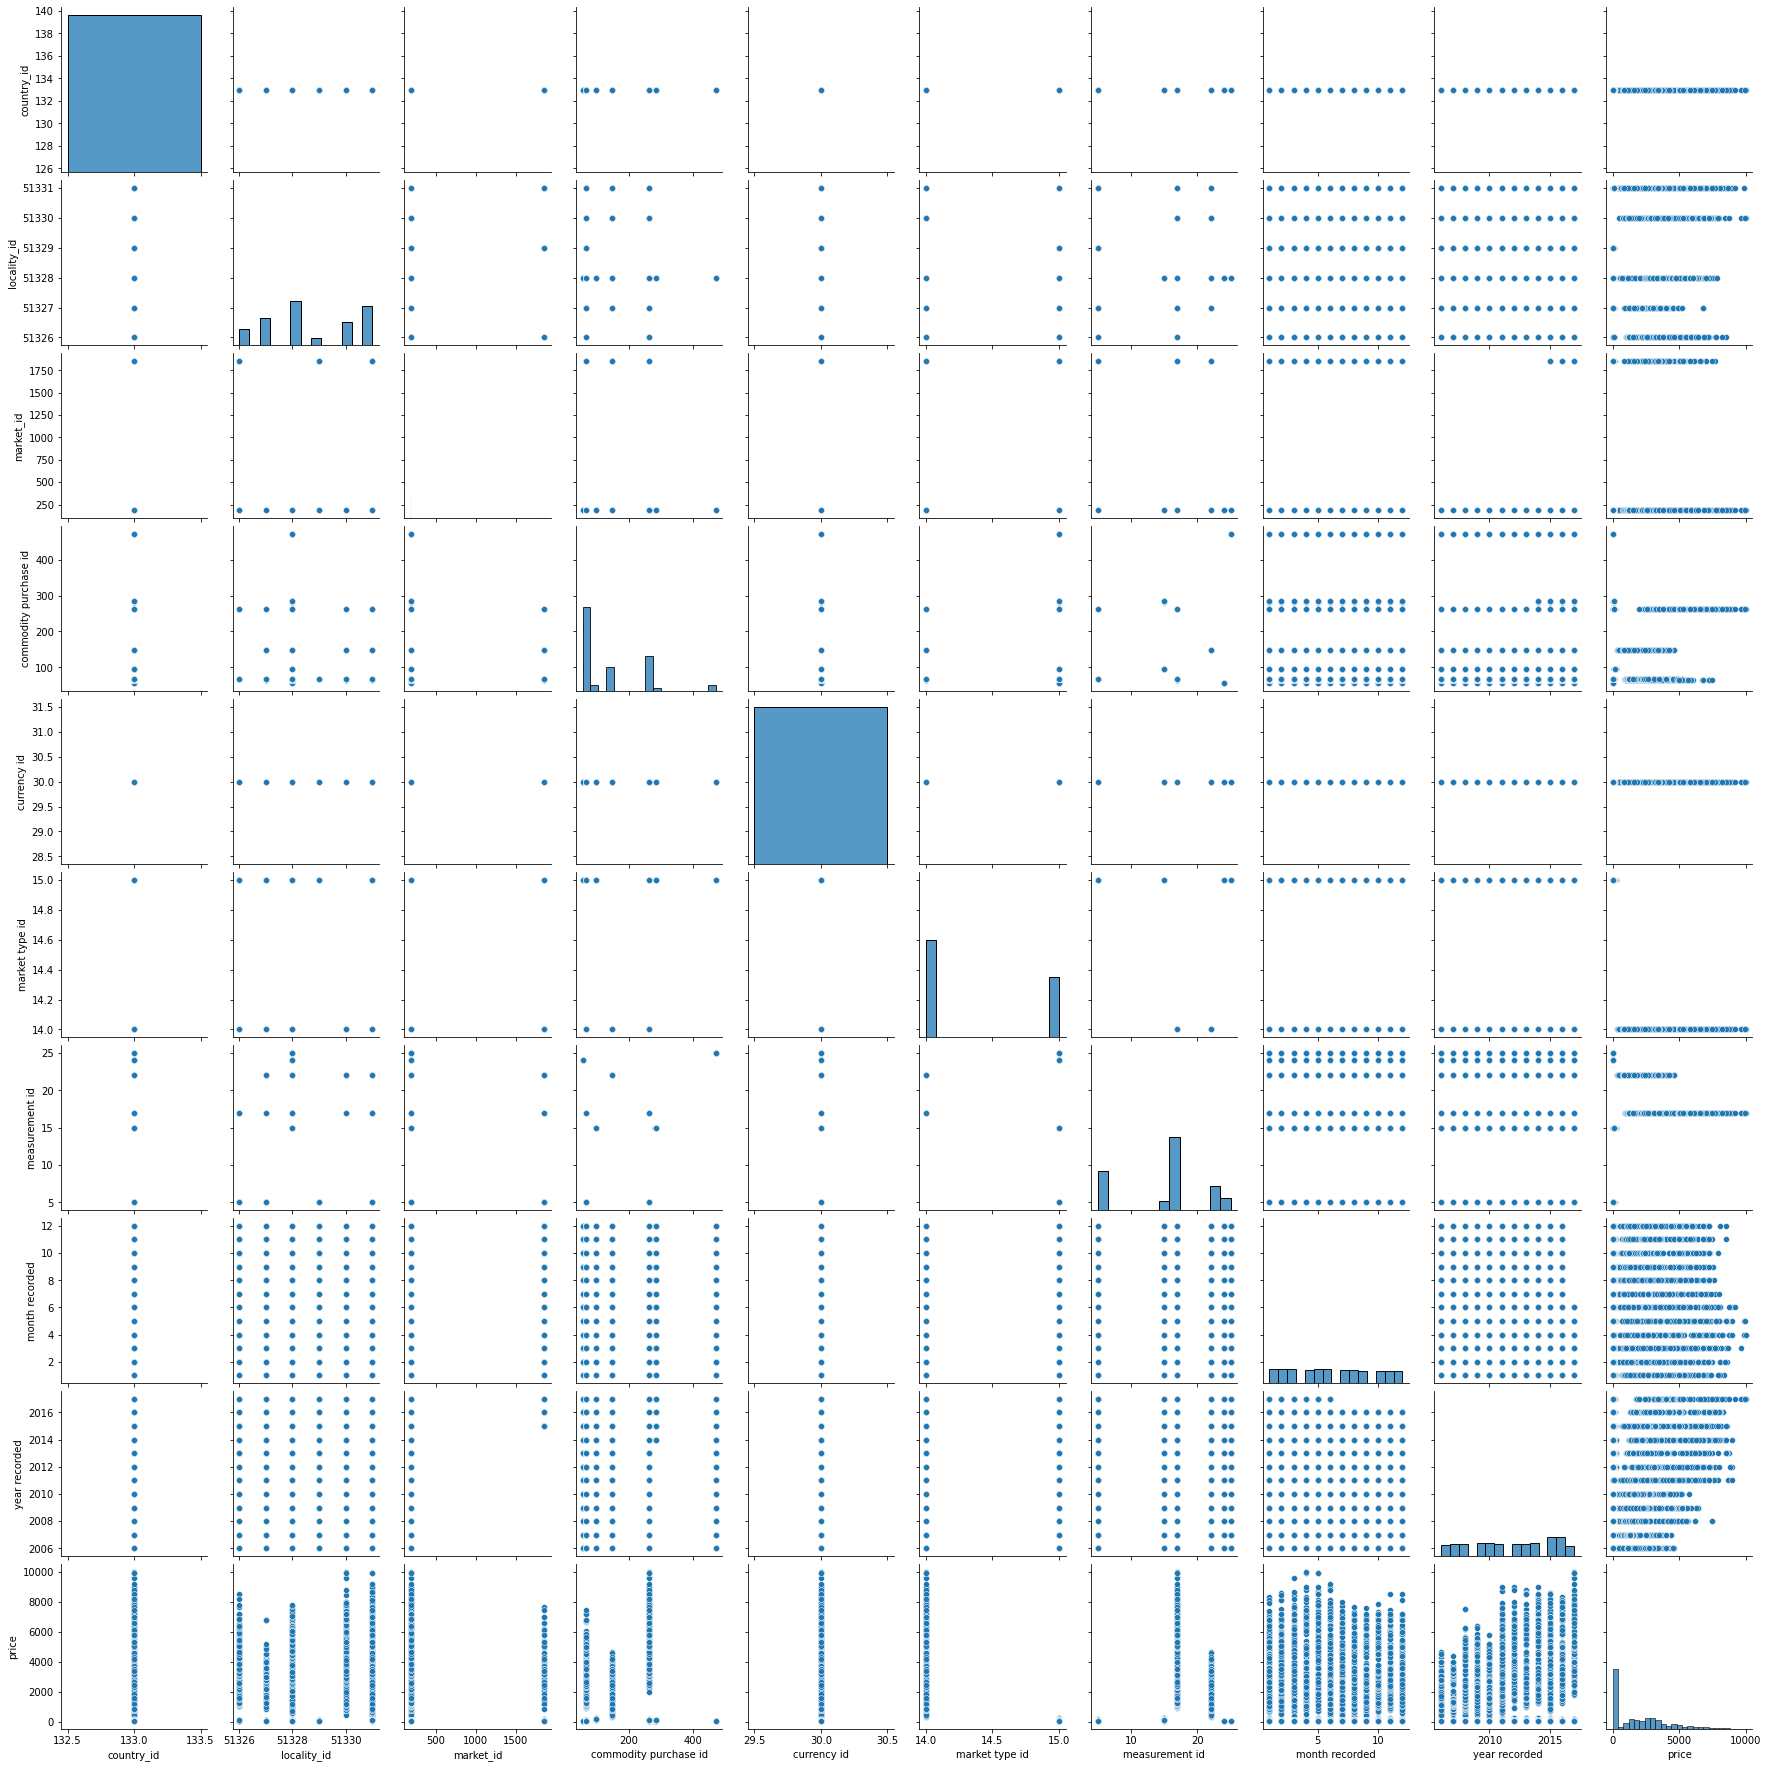

In [8]:
plt.figure(figsize=(15,15))
sns.pairplot(df);

In [9]:
# Drop country name, country id and name of currency
df.drop(df[['country_name', 'country_id', 'name of currency']], inplace=True, axis=1)
df.head()

,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


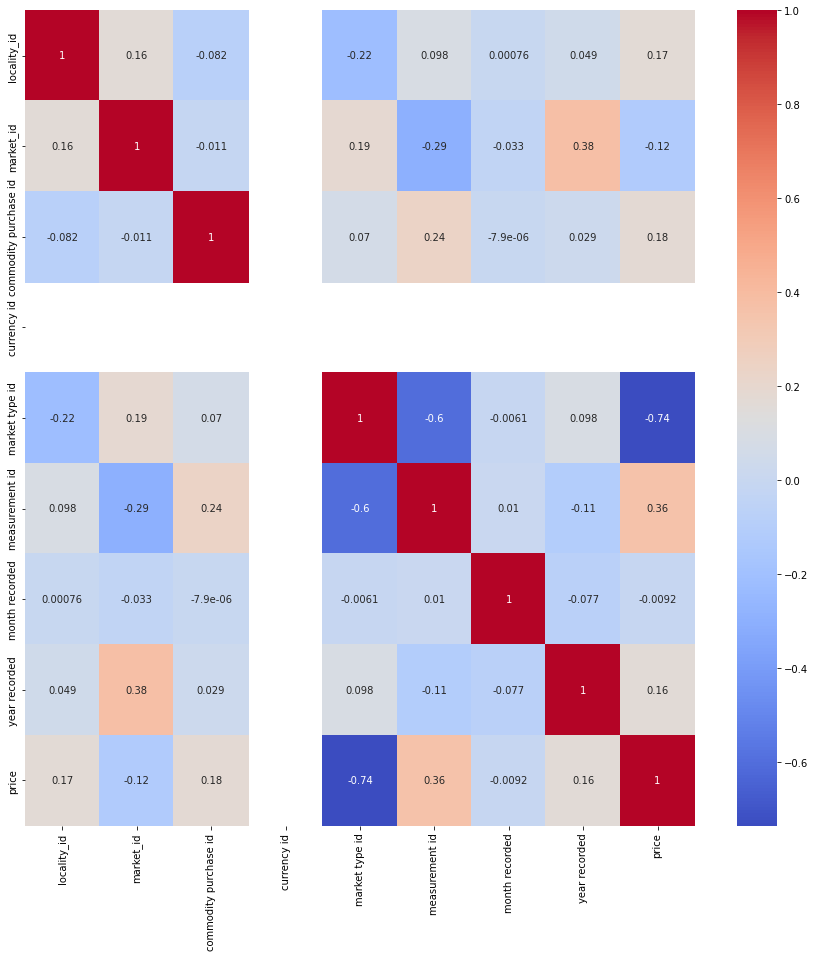

In [10]:
# Find correlation
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr('pearson'), cbar=True, cmap="coolwarm", annot=True);

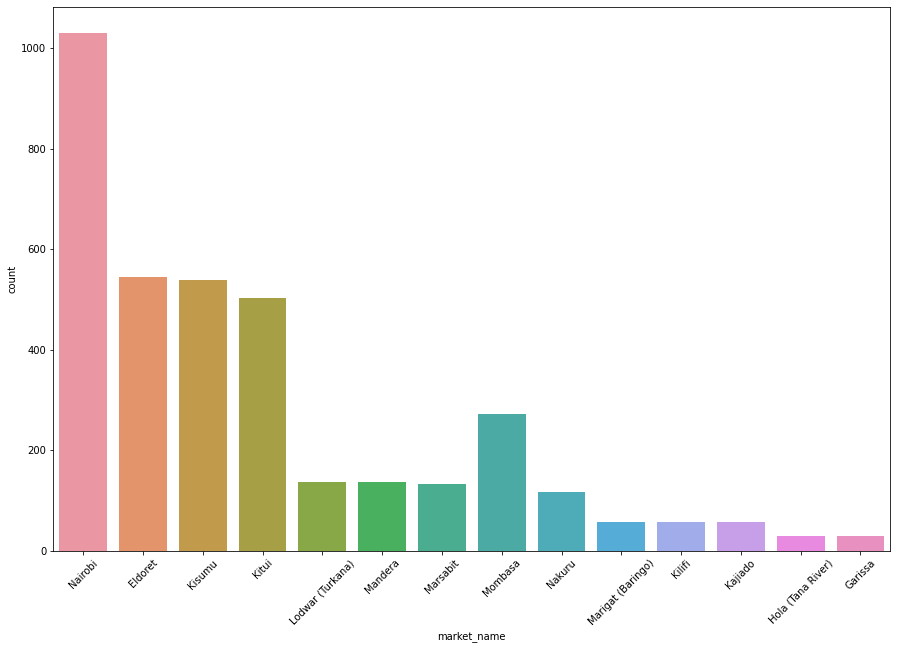

In [11]:
# Plot market count
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.countplot(data=df, x='market_name');

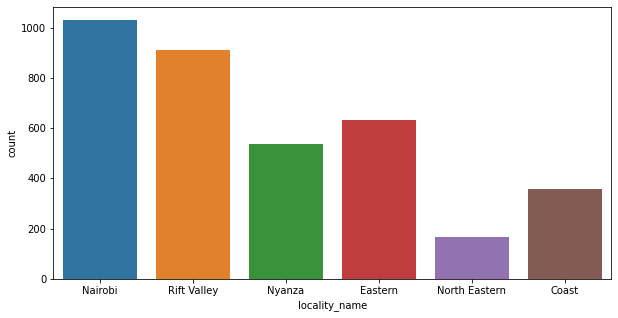

In [12]:
# Plot locality count
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='locality_name');

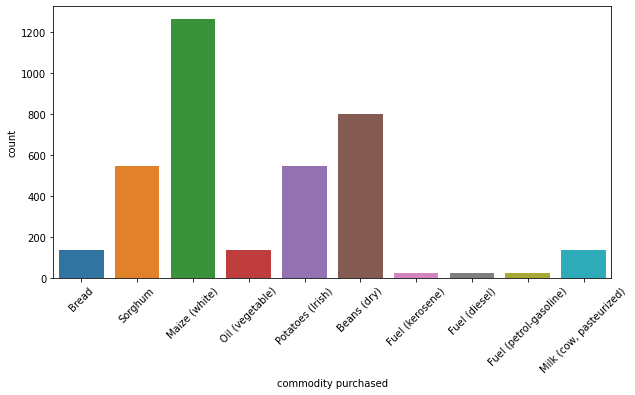

In [13]:
# Plot commodity purchased
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='commodity purchased');

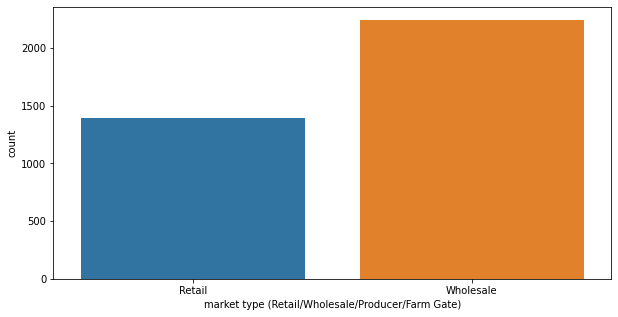

In [14]:
# Plot market type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='market type (Retail/Wholesale/Producer/Farm Gate)');

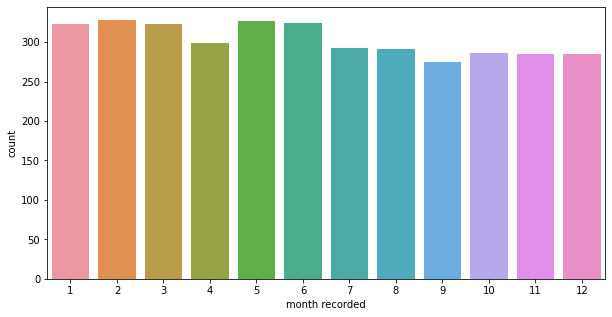

In [15]:
# Plot month recordings
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month recorded');

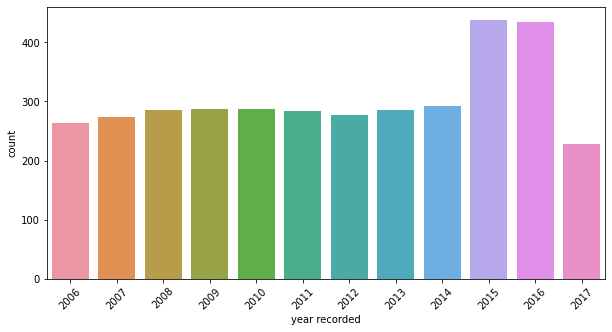

In [16]:
# Plot year recordings
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='year recorded');

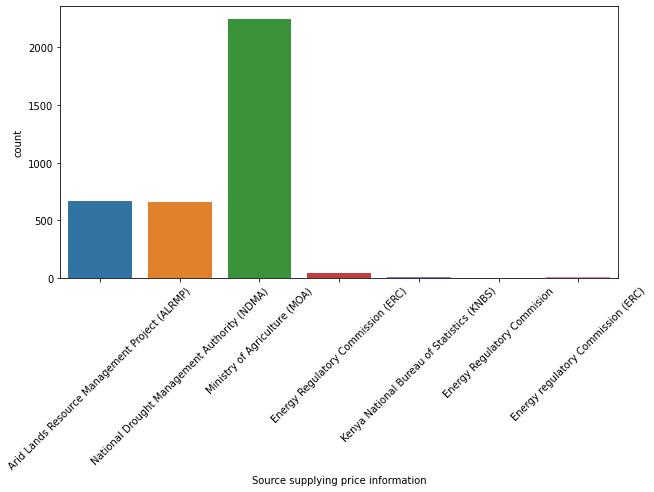

In [17]:
# Plot the source of the information
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='Source supplying price information');

In [18]:
df.shape

(3639, 15)

In [19]:
# Drop all ID columns
df.drop(df[['locality_id', 'market_id', 'commodity purchase id', 'currency id', 'market type id', 'measurement id']], axis=1, inplace=True)

In [20]:
df.shape

(3639, 9)

In [21]:
# Number of columns we will create when we OneHotEncode
counter = 0
for _ in df.columns:
    if df[_].dtype == "object":
        counter += df[_].nunique()
print(counter)

45


In [22]:
df.select_dtypes("O").columns

Index(['locality_name', 'market_name', 'commodity purchased',
       'market type (Retail/Wholesale/Producer/Farm Gate)',
       'unit of goods measurement', 'Source supplying price information'],
      dtype='object')

In [23]:
locality_name = pd.get_dummies(df['locality_name'])
market_name = pd.get_dummies(df['market_name'])
commodity = pd.get_dummies(df['commodity purchased'])
market_type = pd.get_dummies(df['market type (Retail/Wholesale/Producer/Farm Gate)'])
source = pd.get_dummies(df['Source supplying price information'])
measurements = pd.get_dummies(df['unit of goods measurement'])

In [24]:
df = pd.concat([df, locality_name, market_name, commodity, market_type, source, measurements], axis=1)

In [25]:
pd.set_option('max_columns', 54)
df.head()

,locality_name,market_name,commodity purchased,market type (Retail/Wholesale/Producer/Farm Gate),unit of goods measurement,month recorded,year recorded,price,Source supplying price information,Coast,Eastern,Nairobi,North Eastern,Nyanza,Rift Valley,Eldoret,Garissa,Hola (Tana River),Kajiado,Kilifi,Kisumu,Kitui,Lodwar (Turkana),Mandera,Marigat (Baringo),Marsabit,Mombasa,Nairobi,Nakuru,Beans (dry),Bread,Fuel (diesel),Fuel (kerosene),Fuel (petrol-gasoline),Maize (white),"Milk (cow, pasteurized)",Oil (vegetable),Potatoes (Irish),Sorghum,Retail,Wholesale,Arid Lands Resource Management Project (ALRMP),Energy Regulatory Commision,Energy Regulatory Commission (ERC),Energy regulatory Commission (ERC),Kenya National Bureau of Statistics (KNBS),Ministry of Agriculture (MOA),National Drought Management Authority (NDMA),400 G,50 KG,500 ML,90 KG,KG,L
229882,Nairobi,Nairobi,Bread,Retail,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229883,Nairobi,Nairobi,Bread,Retail,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229884,Nairobi,Nairobi,Bread,Retail,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229885,Nairobi,Nairobi,Bread,Retail,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229886,Nairobi,Nairobi,Bread,Retail,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
# Drop the categorical data
df.drop(df.select_dtypes("O").columns, axis=1, inplace=True)
df.head()

,month recorded,year recorded,price,Coast,Eastern,Nairobi,North Eastern,Nyanza,Rift Valley,Eldoret,Garissa,Hola (Tana River),Kajiado,Kilifi,Kisumu,Kitui,Lodwar (Turkana),Mandera,Marigat (Baringo),Marsabit,Mombasa,Nairobi,Nakuru,Beans (dry),Bread,Fuel (diesel),Fuel (kerosene),Fuel (petrol-gasoline),Maize (white),"Milk (cow, pasteurized)",Oil (vegetable),Potatoes (Irish),Sorghum,Retail,Wholesale,Arid Lands Resource Management Project (ALRMP),Energy Regulatory Commision,Energy Regulatory Commission (ERC),Energy regulatory Commission (ERC),Kenya National Bureau of Statistics (KNBS),Ministry of Agriculture (MOA),National Drought Management Authority (NDMA),400 G,50 KG,500 ML,90 KG,KG,L
229882,1,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229883,2,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229884,3,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229885,4,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229886,5,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


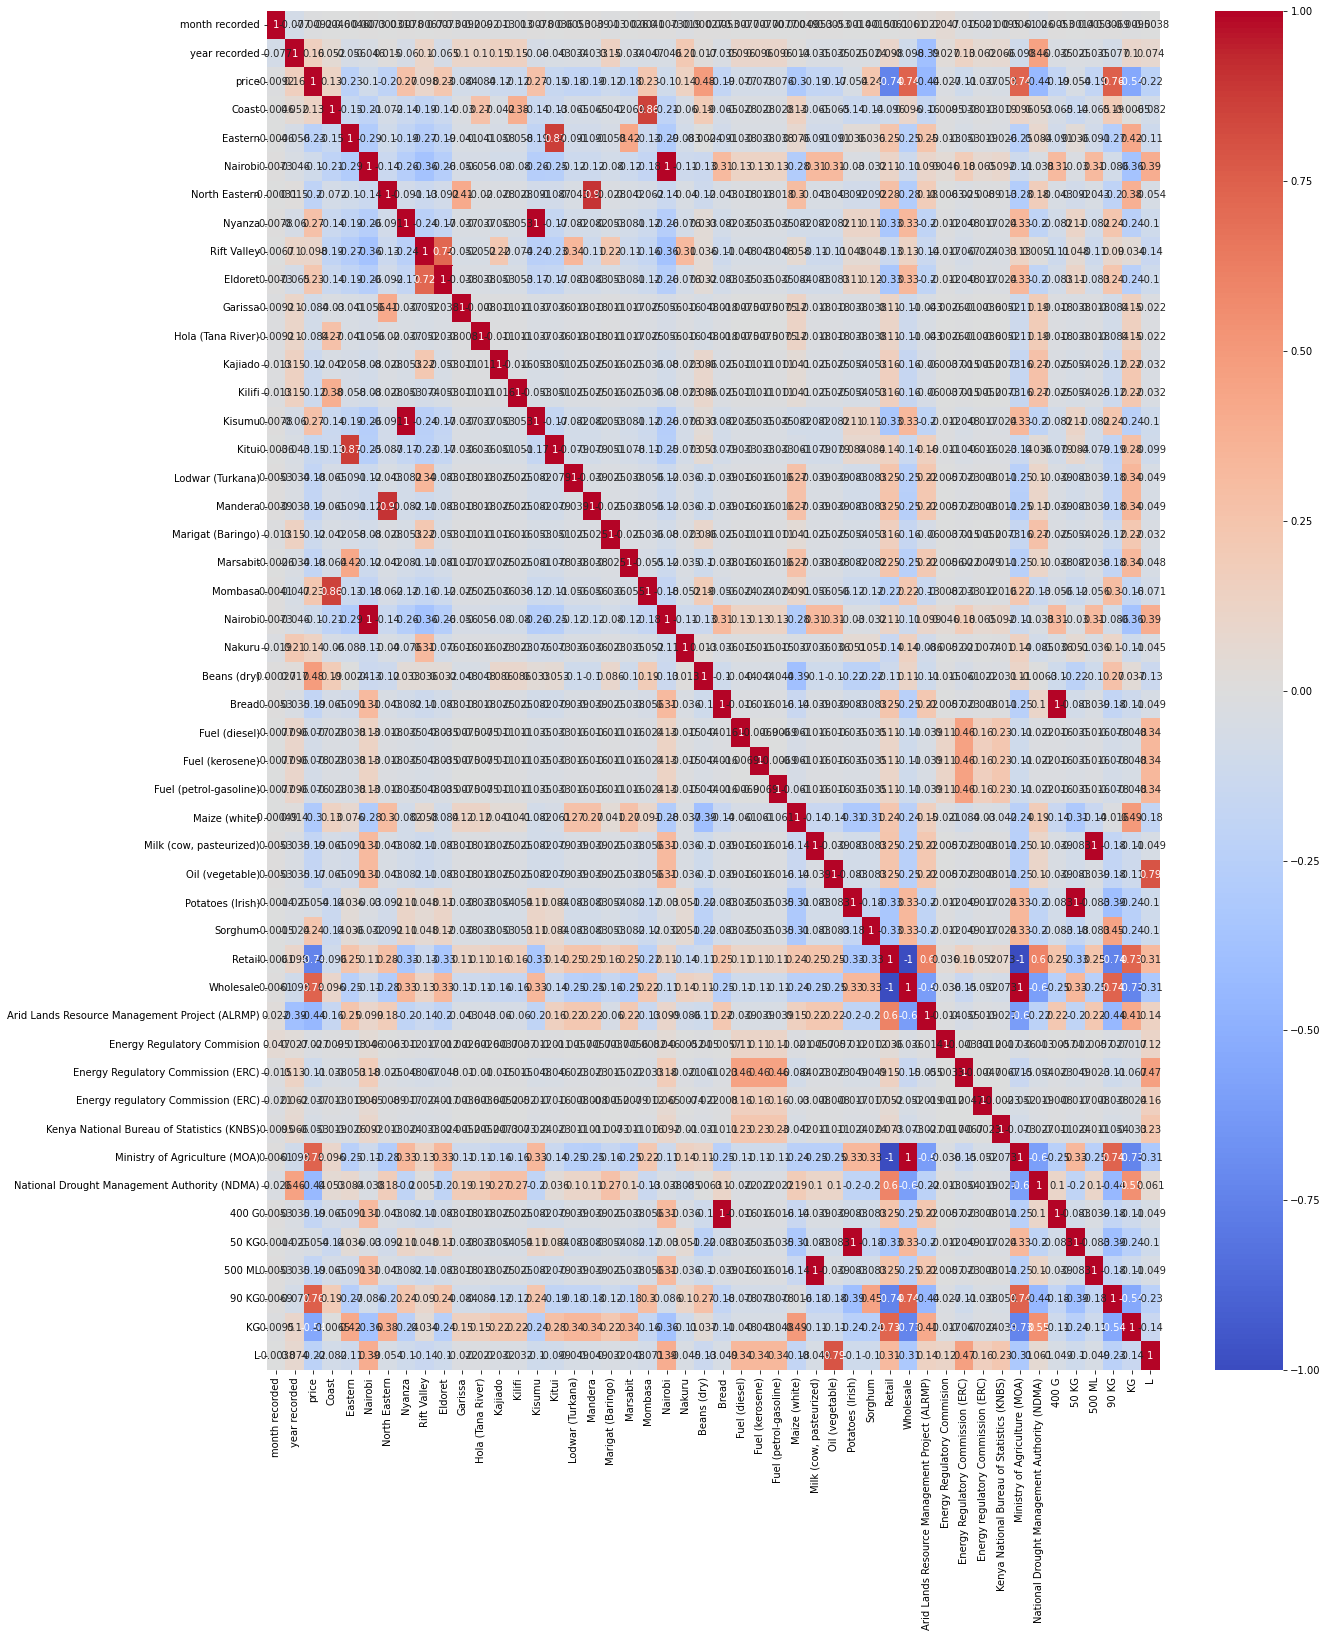

In [27]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr('pearson'), cbar=True, annot=True, cmap="coolwarm");